OLAYINKA BABALOLA

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# Loading data into a DataFrame
df = pd.read_csv("marketing_campaign.csv", sep="\t" )

# Displaying the data.
print(f"Shape of df: {df.shape}\n")

df.head()

Shape of df: (2240, 29)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [174]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

a) Find the average of all the total amount spent on products. Call this variable Avg_amount

In [175]:
# make a list of the products
products= ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# calculate total amounts spents on each products
total_amount = df[products].sum(axis=1)

# calculate average amount spent on each products using numpy 
Avg_amount = np.mean(total_amount)

Avg_amount



605.7982142857143

b) Convert the Avg_amount to deciles (0,1,2,...,9) by creating a new variable, Avg_amount(weights) such that
the higher the Avg_score,the higher the weight.

In [176]:
# listing the products in the dataframe
products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# calculating total amount  and creating the col
df["Total_amount"] = df[products].sum(axis=1)

#calculating Avg_amount using pandas and creating the col
df["Avg_amount"] = df[products].mean(axis=1)

# create the col Avg_amount(weights) and converting the Avg_amount to deciles using pd.qcut()
df["Avg_amount(weights)"] = pd.qcut(df["Avg_amount"], q=10, labels=False)

# validating result
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)



,Total_amount,Avg_amount,Avg_amount(weights)
2053,71,11.833333,2
2019,22,3.666667,0
1891,2069,344.833333,9
335,946,157.666667,7
1600,562,93.666667,5


In [177]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_amount,Avg_amount,Avg_amount(weights)
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,269.500000,9
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,4.500000,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,129.333333,6
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,8.833333,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,70.333333,5


QUESTION 2

a) Calculate the percentage of the customer's Income spent on purchasing products.

COMPULSORY: Validate your resulting by running:
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)

In [178]:
# calculating the percentage income spent and rounding to two decimal places
df["Percentage_income_spent"] = round((df["Income"] / df["Total_amount"]) * 100, 2)

# validating the result of the code run above to get result
df[["Total_amount", "Avg_amount", "Percentage_income_spent"]].sample(n=5, random_state=2)


,Total_amount,Avg_amount,Percentage_income_spent
2053,71,11.833333,52009.86
2019,22,3.666667,137550.00
1891,2069,344.833333,4273.56
335,946,157.666667,6575.48
1600,562,93.666667,9580.60


b) Create a pie chart showing the total amount spent by the customers grouped by their Marital_status Note: Any customer that is not single, together, married or divorced should be considered as others.

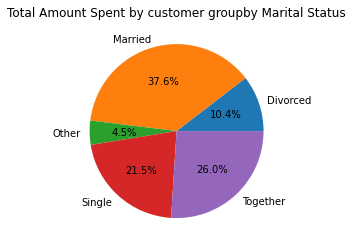

In [179]:
# grouping marital status using lambda
df["Marital_Status"] = df["Marital_Status"].apply(lambda x: x if x in ["Single", "Married", "Divorced", "Together"]
else "Other")

total_spent = df.groupby("Marital_Status")["Total_amount"].sum()

# ploting the pie.chart
plt.pie(total_spent, labels=total_spent.index, autopct='%1.1f%%')
plt.title("Total Amount Spent by customer groupby Marital Status")
plt.show()


QUESTION 3

a) Create a new variable called Recency(weights) which is obtained by dividing the Recency variable into quintiles (0,1,2,3,4) such that customers lower Recency values have higher weights. i.e the smaller the recency value, the greater the Recency(weights).

COMPULSORY: Validate your resulting by running:df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)

In [180]:
# divide Recency into quintiles and assign weights
df["Recency(weights)"] = pd.qcut(df["Recency"], q=5, labels=[4, 3, 2, 1, 0])

# validating the result of the code run above to get result
df[["Total_amount", "Avg_amount", "Avg_amount(weights)","Recency", "Recency(weights)"]].sample(n=5, random_state=2)


,Total_amount,Avg_amount,Avg_amount(weights),Recency,Recency(weights)
2053,71,11.833333,2,46,2
2019,22,3.666667,0,75,1
1891,2069,344.833333,9,87,0
335,946,157.666667,7,38,3
1600,562,93.666667,5,64,1


b) What is the percentage of customers that accepted at least an offer after the end of the promotion campaign?

In [181]:
# define list of column with promotion campaign
promotion = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]

# calculate the sum of the promotion column and comapring it with zero
Accepted_campaign = (df[promotion].sum(axis=1) > 0)

# calculate the percentage of customer that aaccept atleast an offer after the end of the campaign
percentage_accepted = round(np.mean(Accepted_campaign) * 100, 2)

# printing my result

print(f"{percentage_accepted}%")



20.67%


QUESTION 4

a) Calculate the frequency of the purchases. (Do this by finding the total number of purchases made by every customer)

In [182]:
# define columns with purchases
purchases = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",]

# sum all the puchases columns to get purchase frequency
purchase_frequecy = df[purchases].sum()

# print my result
purchase_frequency

ID
0        17
1        18
9        11
13        6
17       28
         ..
11178     5
11181     0
11187     9
11188     9
11191     8
Name: total_purchase, Length: 2240, dtype: int64

b) Create a new variable, Frequency(weights) by converting the result from the previous question to quartiles (0,1,2,3) such that the higher the Frequency, the higher the weight.

COMPULSORY: Validate your resulting by running:
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)

In [183]:
# define columns with purchases
purchases = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",]

# sum all the puchases columns to get purchase frequency
df["purchase_frequency"] = df[purchases].sum(axis=1)
df["Frequency(weights)"] = pd.qcut(df["purchase_frequency"], q= 4, labels=[0, 1, 2, 3])

df[["Total_amount", "Avg_amount", "Avg_amount(weights)","purchase_frequency", "Frequency(weights)"]].sample(n=5,
random_state=2)


,Total_amount,Avg_amount,Avg_amount(weights),purchase_frequency,Frequency(weights)
2053,71,11.833333,2,8,0
2019,22,3.666667,0,4,0
1891,2069,344.833333,9,20,2
335,946,157.666667,7,22,3
1600,562,93.666667,5,20,2


QUESTION 5

a) Calculate the Customer Personality Analysis using RFM (Recency Frequency Monetary) value using the formula: Recency(weights) + Frequency(weights) + Avg_amount(weights).

In [184]:
# doing the summation of the columns in the question shows that some of the columns have no numerical values so i checked 
# the data type
print(df['Recency(weights)'].dtype)
print(df['Frequency(weights)'].dtype)
print(df['Avg_amount(weights)'].dtype)

category
category
int64


In [185]:
# converting categorical columns to numericals data type using .astype() method
df["Recency(weights)"] = df["Recency(weights)"].astype(int)
df["Frequency(weights)"] = df["Frequency(weights)"].astype(int)

#calculate the customer personality analysis using RFM
df['RFM'] = df['Recency(weights)'] + df['Frequency(weights)'] + df['Avg_amount(weights)']

# printing my result

df["RFM"]


0       14
1        3
2       11
3        4
4        7
        ..
2235    12
2236    10
2237    10
2238    13
2239     6
Name: RFM, Length: 2240, dtype: int64

b) Create a new variable called Customer_value by segmenting the customers using the RFM value. The RFM value should be converted into tercile (3 groups). Customer_value should have the following labels: high_value, medium_value and low_value which represents the binned RFM values.

COMPULSORY: Validate your resulting by running:
df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2)

In [186]:
df["Customer_value"] = pd.qcut(df["RFM"], q= 3, labels=["low_value", "medium_value", "high_value"])

df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2)

,Recency(weights),Frequency(weights),Avg_amount(weights),RFM,Customer_value
2053,2,0,2,4,low_value
2019,1,0,0,1,low_value
1891,0,2,9,11,high_value
335,3,3,7,13,high_value
1600,1,2,5,8,medium_value
1459,1,2,5,8,medium_value
2161,1,1,4,6,low_value
1026,2,0,3,5,low_value
68,4,2,6,12,high_value
2088,4,0,2,6,low_value


In [187]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Total_amount,Avg_amount,Avg_amount(weights),Percentage_income_spent,Recency(weights),purchase_frequency,Frequency(weights),RFM,Customer_value
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,1,1617,269.500000,9,3595.42,2,25,3,14,high_value
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,27,4.500000,0,171644.44,3,6,0,3,low_value
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,776,129.333333,6,9228.48,3,21,2,11,high_value
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,53,8.833333,1,50275.47,3,8,0,4,low_value
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,422,70.333333,5,13813.51,0,19,2,7,medium_value
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,716,119.333333,6,8730.87,4,22,3,13,high_value
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,590,98.333333,5,9429.66,3,21,2,10,medium_value
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,169,28.166667,3,19795.27,3,10,1,7,medium_value
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,1,46,7.666667,1,65980.43,4,6,0,5,low_value
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,49,8.166667,1,11526.53,1,2,0,2,low_value
